In [217]:
import pandas as pd
import numpy as np
import duckdb

In [218]:
df = pd.read_csv("/Users/sofiascaiano/Documents/maestria/Data Mining EyF/DMEYF/project/project_wednesday/data/competencia_01.csv")

In [176]:
df.groupby('foto_mes')[['mpayroll', 'mpayroll2']].mean()

,mpayroll,mpayroll2
foto_mes,,
2021-01-31,67502.712209,120.280876
2021-02-28,65328.197261,73.537006
2021-03-31,75745.785266,70.899518
2021-04-30,73641.689675,69.645033
2021-05-31,72999.739638,73.453385
2021-06-30,107150.391901,124.062572


In [187]:
df.groupby('foto_mes')[['mpayroll', 'mpayroll2', 'cpayroll_trx']].describe().T

foto_mes              2021-01-31    2021-02-28    2021-03-31    2021-04-30  \
mpayroll     count  1.615270e+05  1.621550e+05  1.631090e+05  1.634180e+05   
             mean   6.750271e+04  6.532820e+04  7.574579e+04  7.364169e+04   
             std    2.528776e+05  2.024587e+05  2.488730e+05  2.623774e+05   
             min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
             25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
             50%    1.649209e+04  1.980531e+04  2.598735e+04  2.726110e+04   
             75%    9.691795e+04  9.579588e+04  1.034727e+05  1.070462e+05   
             max    3.279585e+07  2.109094e+07  4.259191e+07  5.548110e+07   
mpayroll2    count  1.615270e+05  1.621550e+05  1.631090e+05  1.634180e+05   
             mean   1.202809e+02  7.353701e+01  7.089952e+01  6.964503e+01   
             std    8.613945e+03  2.912267e+03  3.012846e+03  3.108668e+03   
             min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
             25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
             50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
             75%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
             max    2.647949e+06  3.937421e+05  4.406436e+05  4.727556e+05   
cpayroll_trx count  1.615270e+05  1.621550e+05  1.631090e+05  1.634180e+05   
             mean   9.361717e-01  8.780981e-01  9.513638e-01  9.050472e-01   
             std    1.432097e+00  1.259167e+00  1.493680e+00  1.484189e+00   
             min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
             25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
             50%    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
             75%    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
             max    6.300000e+01  6.000000e+01  9.400000e+01  1.040000e+02   

foto_mes              2021-05-31    2021-06-30  
mpayroll     count  1.639170e+05  1.643130e+05  
             mean   7.299974e+04  1.071504e+05  
             std    2.095633e+05  2.329104e+05  
             min    0.000000e+00  0.000000e+00  
             25%    0.000000e+00  0.000000e+00  
             50%    3.548164e+04  4.780278e+04  
             75%    1.121376e+05  1.677412e+05  
             max    3.714763e+07  2.554270e+07  
mpayroll2    count  1.639170e+05  1.643130e+05  
             mean   7.345338e+01  1.240626e+02  
             std    3.610034e+03  5.497544e+03  
             min    0.000000e+00  0.000000e+00  
             25%    0.000000e+00  0.000000e+00  
             50%    0.000000e+00  0.000000e+00  
             75%    0.000000e+00  0.000000e+00  
             max    8.977300e+05  1.226397e+06  
cpayroll_trx count  1.639170e+05  1.643130e+05  
             mean   9.678252e-01  1.250668e+00  
             std    1.618356e+00  1.771712e+00  
             min    0.000000e+00  0.000000e+00  
             25%    0.000000e+00  0.000000e+00  
             50%    1.000000e+00  1.000000e+00  
             75%    1.000000e+00  2.000000e+00  
             max    1.110000e+02  1.430000e+02

In [223]:
# 2. Ordenar el DataFrame por cliente y luego por fecha
# Esto es esencial para que el shift() traiga el mes anterior correcto.
df = df.sort_values(by=['numero_de_cliente', 'foto_mes']).reset_index(drop=True)

# 3. Aplicar groupby() y shift()
# Agrupar por 'numero_de_cliente' y aplicar un shift de 1 a 'valor_a_laggear'
df['mpayroll_lag1'] = df.groupby('numero_de_cliente')['mpayroll'].shift(1)
df['mpayroll_lag2'] = df.groupby('numero_de_cliente')['mpayroll'].shift(2)

(-1.0, 2.0)

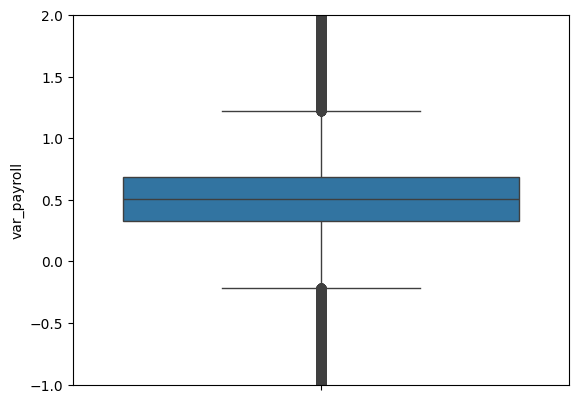

In [123]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.boxplot(data=df_junio, y='var_payroll')
plt.ylim(-1, 2)

In [201]:
mask = (df['foto_mes'] == '2021-06-30') & (df['mpayroll']/df['mpayroll_lag1'] >= 1.3) & (df['mpayroll']/df['mpayroll_lag2'] >= 1.3)

In [202]:
df['flag_aguinaldo'] = np.where(mask, 1, 0)

In [203]:
df['flag_aguinaldo'].value_counts()

flag_aguinaldo
0    918904
1     59535
Name: count, dtype: int64

In [204]:
df['cpayroll_trx_fix'] = np.where((df['flag_aguinaldo'] == 1) & (df['cpayroll_trx'] > 1), df['cpayroll_trx'] - 1, df['cpayroll_trx'])
df['mpayroll_fix'] = np.where((df['flag_aguinaldo'] == 1), df['mpayroll_lag1'], df['mpayroll'])

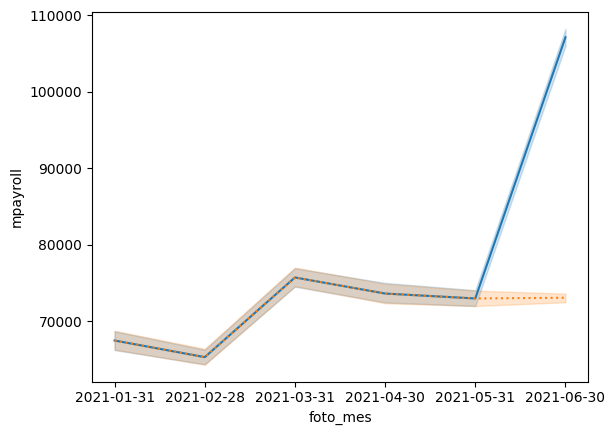

In [214]:
sns.lineplot(data=df, x='foto_mes', y='mpayroll', estimator='mean')
sns.lineplot(data=df, x='foto_mes', y='mpayroll_fix', estimator='mean')

plt.show()

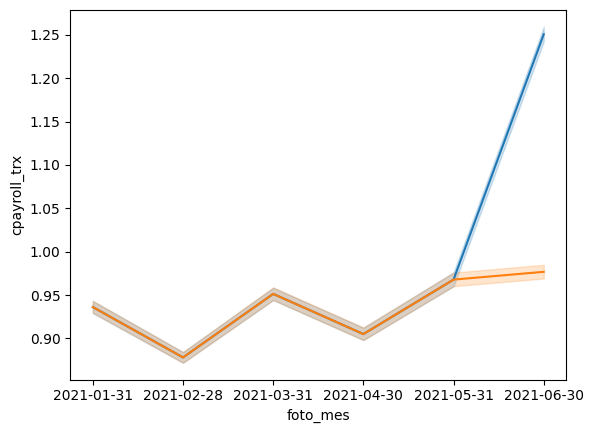

In [215]:
sns.lineplot(data=df, x='foto_mes', y='cpayroll_trx', estimator='mean')
sns.lineplot(data=df, x='foto_mes', y='cpayroll_trx_fix', estimator='mean')

plt.show()

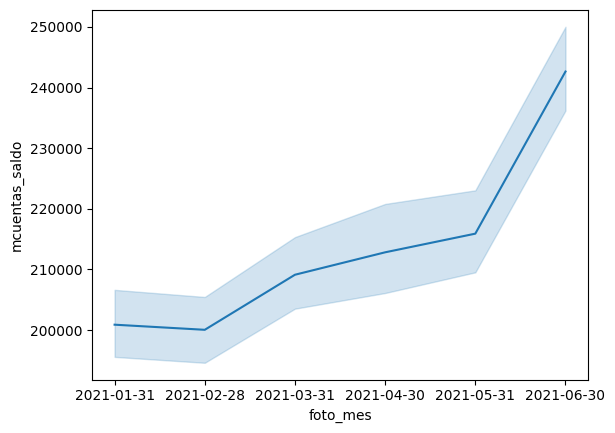

In [216]:
sns.lineplot(data=df, x='foto_mes', y='mcuentas_saldo', estimator='mean')
# sns.lineplot(data=df, x='foto_mes', y='mcuentas_saldo_fix', estimator='mean')

plt.show()

In [225]:
sql = """
SELECT a.* EXCLUDE(mpayroll, cpayroll_trx),
       case when flag_aguinaldo = 1 then mpayroll_lag1 else mpayroll end as mpayroll,
       case when flag_aguinaldo = 1 and cpayroll_trx > 1 then cpayroll_trx - 1 else cpayroll_trx end as cpayroll_trx
FROM (
SELECT *,
       case when foto_mes = '2021-06-30'
           and mpayroll/mpayroll_lag1 >= 1.3
           and mpayroll/mpayroll_lag2 >= 1.3
                then 1
            else 0
           end as flag_aguinaldo
FROM df) as a
"""

# Ejecutar la consulta SQL
con = duckdb.connect(database=":memory:")
con.register("df", df)
df = con.execute(sql).df()
con.close()

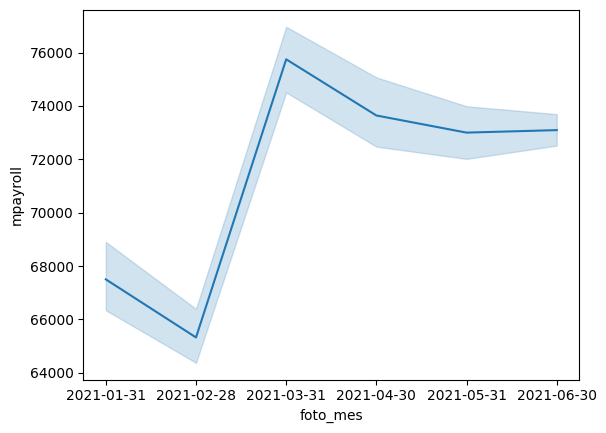

In [226]:
sns.lineplot(data=df, x='foto_mes', y='mpayroll', estimator='mean')
plt.show()

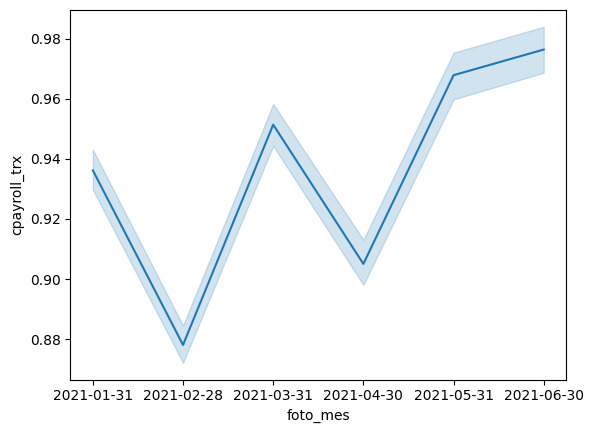

In [227]:
sns.lineplot(data=df, x='foto_mes', y='cpayroll_trx', estimator='mean')
plt.show()